# Notebook to parse the Feb 6 data from Arduino and SQM sensors

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from google.colab import drive

drive.mount("/content/drive/LENSS/Data/Sensors Data/2022-06")

ValueError: ignored

In [ ]:
# This parses the paths
import glob

In [ ]:
# This is an astronomy package that is pretty convenient for i/o
import astropy.table

In [ ]:
fnames = glob.glob(
    "/My Drive/LENSS/Data/Sensors Data/2020-02-20/ardata_2020-02-20.txt"
)

In [ ]:
# We are going to read with Pandas
import pandas as pd

In [ ]:
tab = []
for fname in fnames:
    tab.append(pd.read_table(fname, names="t"))

In [ ]:
import re

In [ ]:
# Each row is a string and has several parts with units.
# We split each string in value and units and get rid of the units
def get_rid_of_units(s):
    for i, c in enumerate(s):
        if (c.isdigit() == False) & (c != " ") & (c != "."):
            return float(s[:i])

In [ ]:
# Test the function
get_rid_of_units("0000062002Hz")

62002.0

In [ ]:
# We are going to dump the data into a dictionary and then convert to astropy table
data = dict()

In [ ]:
# The keys of the dictionary are going to be the name of the columns
keys = ["time", "freq", "col3", "col4", "temp"]

In [ ]:
# Initialize the dictionary with empty lists for each key
for key in keys:
    data[key] = []

In [ ]:
# Now we parse the SQM file
for row in tab[0][1::2]["t"].values:
    csvalues = row.split(",")[1:]
    for i, val in enumerate(csvalues):
        data[keys[i]].append(get_rid_of_units(val))

IndexError: ignored

In [ ]:
# And dump it into a table
tab2 = astropy.table.Table(data)

In [ ]:
# And write as csv
tab2.write("Feb6_2020_data_SLQM.csv", format="ascii.csv")

Text(0, 0.5, 'Frequency [Hz]')

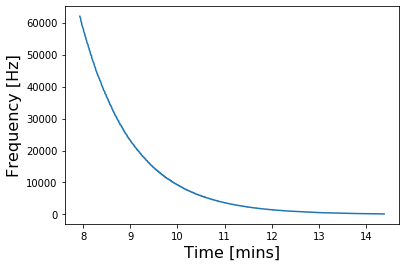

In [ ]:
# Check the values
plt.figure(figsize=(6, 4))
plt.plot(tab2["time"], tab2["freq"])
plt.xlabel("Time [mins]", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)
# plt.loglog()

Text(0, 0.5, 'Temperature [$^{\\circ}$ C]')

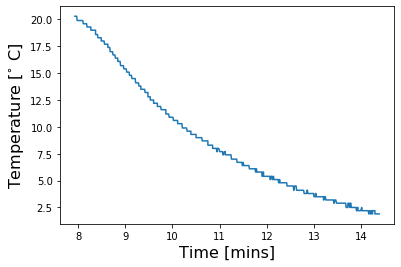

In [ ]:
# Another plot
plt.plot(tab2["time"], tab2["temp"])
plt.xlabel("Time [mins]", fontsize=16)
plt.ylabel(r"Temperature [$^{\circ}$ C]", fontsize=16)
# plt.loglog()

In [ ]:
# Read the Arduino data table
tab4 = pd.read_table(fnames[-1], names=("a", "b"))

In [ ]:
# Check it out
tab4

,a,b
0,START,NaN
1,3.17 light volts | FREQ: 0,0.67 temp volts; 16.89 degrees C; 62.41 degrees F
2,3.17 light volts | FREQ: 0,0.67 temp volts; 16.89 degrees C; 62.41 degrees F
3,3.17 light volts | FREQ: 0,0.66 temp volts; 16.41 degrees C; 61.53 degrees F
4,3.17 light volts | FREQ: 0,0.67 temp volts; 17.38 degrees C; 63.29 degrees F
...,...,...
1956,0.74 light volts | FREQ: 752,0.51 temp volts; 0.78 degrees C; 33.41 degrees F
1957,0.74 light volts | FREQ: 749,0.51 temp volts; 0.78 degrees C; 33.41 degrees F
1958,0.74 light volts | FREQ: 748,0.51 temp volts; 0.78 degrees C; 33.41 degrees F
1959,0.73 light volts | FREQ: 744,0.51 temp volts; 0.78 degrees C; 33.41 degrees F


In [ ]:
# Split it to put it in csv format
data2 = dict()
keys = ["voltage_light", "freq", "voltage_temp", "temp_c", "temp_f"]
for key in keys:
    data2[key] = []
for row in tab4["a"].values[1:]:
    data2[keys[0]].append(float(row.split()[0]))
    data2[keys[1]].append(float(row.split()[-1]))

In [ ]:
for row in tab4["b"].values[1:]:
    vals = row.split(";")
    for i, val in enumerate(vals):
        data2[keys[i + 2]].append(float(val.split()[0]))

In [ ]:
# Dump everything in tab5 as astropy.table.Table
tab5 = astropy.table.Table(data2)

In [ ]:
# Write the arduino data in a CSV file
tab5.write("Feb6_2020_data_Arduino.csv", format="ascii.csv", overwrite=True)

Text(0, 0.5, 'Frequency [Hz]')

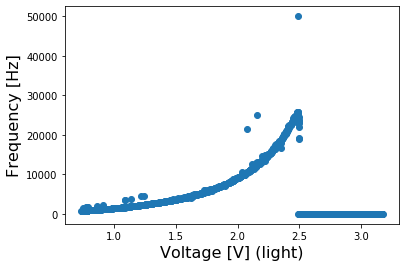

In [ ]:
# Check some of the quantities
plt.scatter(tab5["voltage_light"], tab5["freq"])
plt.xlabel("Voltage [V] (light)", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)

Text(0, 0.5, 'Temperature [$^{\\circ}$ C]')

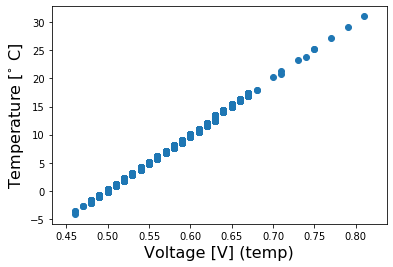

In [ ]:
plt.scatter(tab5["voltage_temp"], tab5["temp_c"])
plt.xlabel("Voltage [V] (temp)", fontsize=16)
plt.ylabel(r"Temperature [$^{\circ}$ C]", fontsize=16)

Text(0, 0.5, 'Frequency [Hz]')

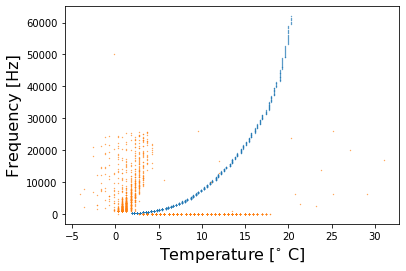

In [ ]:
# Does the data correlate? Plotting the temperature and measured frequencies
plt.scatter(tab2["temp"], tab2["freq"], s=0.1, label="SQM")
plt.scatter(tab5["temp_c"], tab5["freq"], s=0.1, label="Arduino")
plt.xlabel(r"Temperature [$^{\circ}$ C]", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)

Text(0, 0.5, 'Frequency [Hz] SQM')

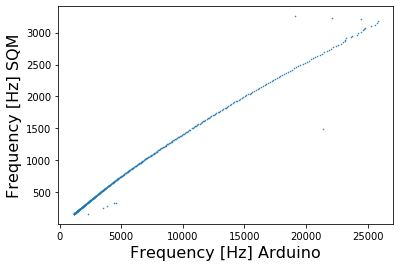

In [ ]:
# Assuming that the data-taking started at the same time,
# we subsample the Arduino's data by a factor of 2 i.e., data_arduino[::2]
# and only select up to twice the length of the data from SQM
plt.scatter(
    tab5["freq"][0:1830:2][tab5["freq"][0:1830:2] != 0],
    tab2["freq"][tab5["freq"][0:1830:2] != 0],
    s=0.3,
)
plt.xlabel("Frequency [Hz] Arduino", fontsize=16)
plt.ylabel("Frequency [Hz] SQM", fontsize=16)

(-2, 8)

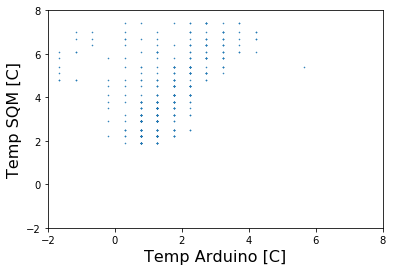

In [ ]:
# Assuming that the data-taking started at the same time,
# we subsample the Arduino's data by a factor of 2 i.e., data_arduino[::2]
# and only select up to twice the length of the data from SQM
plt.scatter(
    tab5["temp_c"][0:1830:2][tab5["freq"][0:1830:2] != 0],
    tab2["temp"][tab5["freq"][0:1830:2] != 0],
    s=0.3,
)
plt.xlabel("Temp Arduino [C]", fontsize=16)
plt.ylabel("Temp SQM [C]", fontsize=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)